In [5]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import os
import pickle
import dask.dataframe as dd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import subprocess
import random
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import numpy as np
import cvxpy as cp

In [6]:
split_number = 0

In [7]:
output_file_ef = f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out_sv/split_number_{split_number}/r2_pred_ecotype_freq.csv' 
output_file_af = f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out_sv/split_number_{split_number}/r2_pred_allele_freq.csv' 
output_file_efsp = f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out_sv/split_number_{split_number}/spcorr_pred_ecotype_freq.csv' 

In [9]:
all_ef = pd.DataFrame()
for split_number in range(100):
    if split_number == 8:
        pass
    else: 
        output_file_ef = f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out_sv/split_number_{split_number}/r2_pred_ecotype_freq.csv' 
        ef = pd.read_csv(output_file_ef)
        ef['site'] = ef['sample'].str.split('_').str[0]
        all_ef = pd.concat([all_ef,ef])

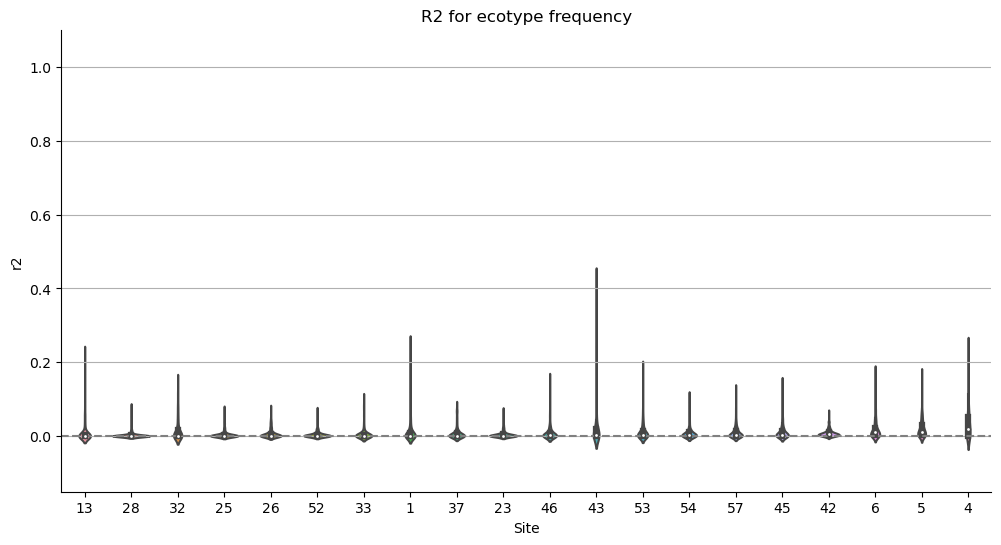

In [10]:
medians = all_ef.groupby('site')['r2'].median().sort_values()

# Set the size of the plot
plt.figure(figsize=(12, 6))  # You can adjust the width and height as needed

# Create the plot, ordering by median 'r2'
# Use 'scale' to adjust the width of violins; options are 'area', 'count', or 'width'
sns.violinplot(data=all_ef, y='r2', x='site', order=medians.index)

# Draw a horizontal line at y=0
plt.axhline(0, color='grey', linestyle='--')  # Color and style are adjustable
plt.ylim(-0.15, 1.1)
plt.grid(axis='y')
# Remove top and right spines
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(False)  # Remove the top spine
ax.spines['right'].set_visible(False)

# Optionally, add labels or a title
plt.title('R2 for ecotype frequency')
plt.xlabel('Site')
plt.ylabel('r2')

# Show the plot
plt.show()

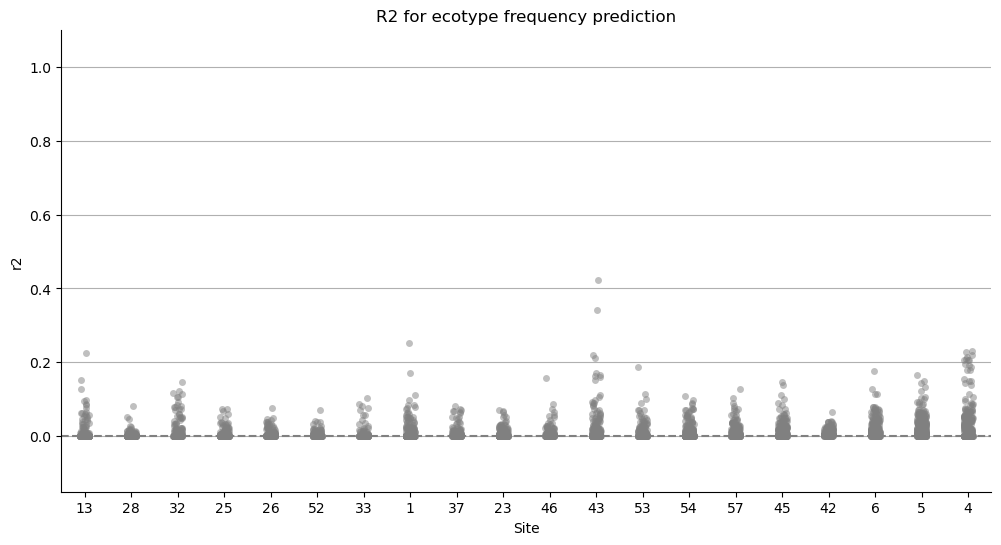

In [11]:
plt.figure(figsize=(12, 6)) 
plt.axhline(0, color='grey', linestyle='--')  # Color and style are adjustable

sns.stripplot(data=all_ef, y='r2', x='site', order=medians.index, alpha = 0.5, color='Grey')
plt.title('R2 for ecotype frequency prediction')
plt.xlabel('Site')
plt.ylabel('r2')
plt.ylim(-0.15, 1.1)
plt.grid(axis='y')
# Remove top and right spines
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(False)  # Remove the top spine
ax.spines['right'].set_visible(False)

In [12]:
all_af = pd.DataFrame()
for split_number in range(100):
    if split_number == 8:
        pass
    else: 
        output_file_af = f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out_sv/split_number_{split_number}/r2_pred_allele_freq.csv' 
        af = pd.read_csv(output_file_af)
        af['site'] = af['sample'].str.split('_').str[0]
        all_af = pd.concat([all_af,af])

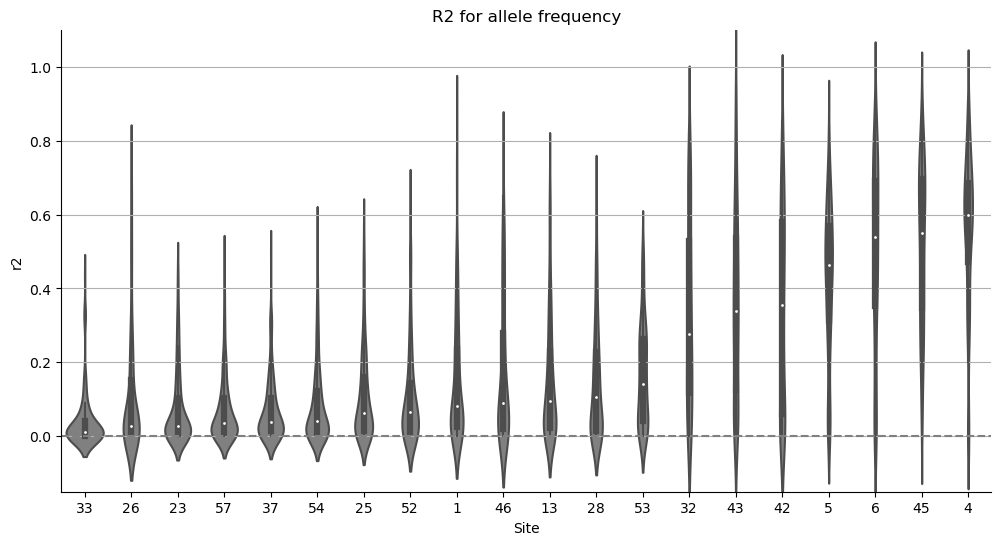

In [13]:
medians = all_af.groupby('site')['r2'].median().sort_values()

# Set the size of the plot
plt.figure(figsize=(12, 6))  # You can adjust the width and height as needed

# Create the plot, ordering by median 'r2'
# Use 'scale' to adjust the width of violins; options are 'area', 'count', or 'width'
sns.violinplot(data=all_af, y='r2', x='site', order=medians.index, color='Grey')

# Draw a horizontal line at y=0
plt.axhline(0, color='grey', linestyle='--')  # Color and style are adjustable

# Optionally, add labels or a title
plt.title('R2 for allele frequency')
plt.xlabel('Site')
plt.ylabel('r2')
plt.ylim(-0.15, 1.1)
plt.grid(axis='y')
# Remove top and right spines
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(False)  # Remove the top spine
ax.spines['right'].set_visible(False)  # Remove the right spine
# Show the plot
plt.show()

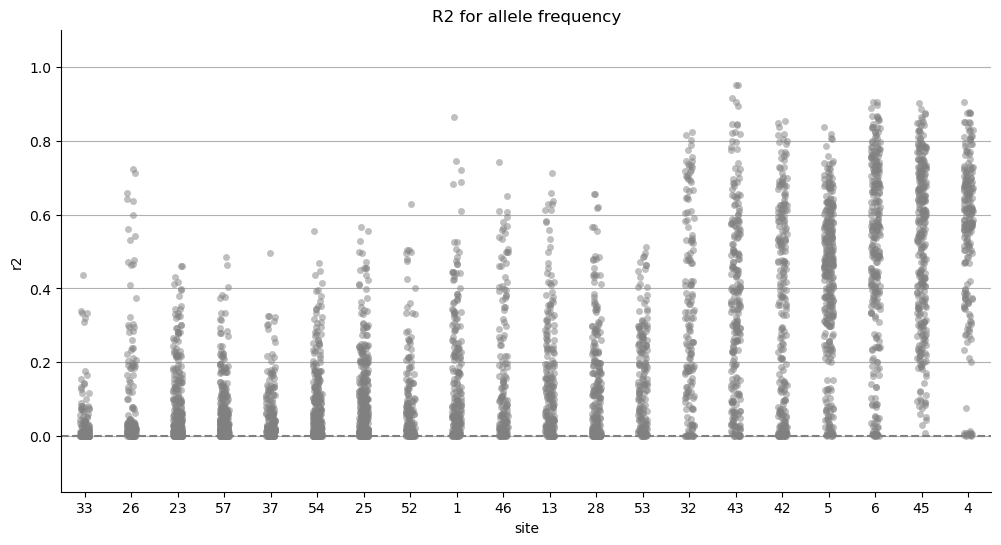

In [14]:
medians = all_af.groupby('site')['r2'].median().sort_values()
plt.figure(figsize=(12, 6)) 
plt.axhline(0, color='grey', linestyle='--')  # Color and style are adjustable

sns.stripplot(data=all_af, y='r2', x='site', order=medians.index, alpha = 0.5, color='Grey')
plt.title('R2 for allele frequency')
plt.ylim(-0.15, 1.1)
plt.grid(axis='y')
# Remove top and right spines
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(False)  # Remove the top spine
ax.spines['right'].set_visible(False)  # Remove the right spine

In [17]:
all_ef = pd.DataFrame()
for split_number in range(100):
    if split_number == 8:
        pass
    else: 
        output_file_ef = f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out_sv/split_number_{split_number}/spcorr_pred_ecotype_freq.csv' 
        ef = pd.read_csv(output_file_ef)
        ef['site'] = ef['sample'].str.split('_').str[0]
        all_ef = pd.concat([all_ef,ef])

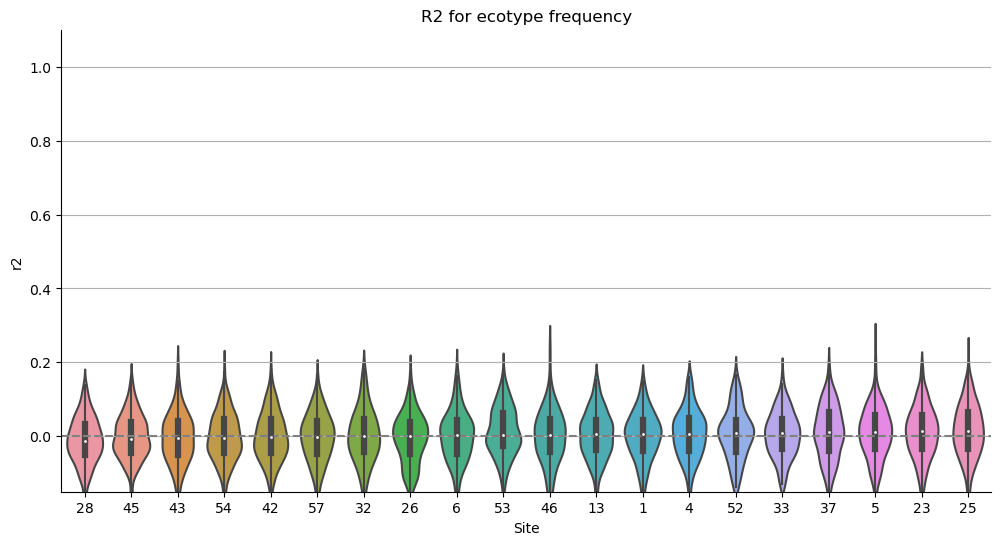

In [18]:
medians = all_ef.groupby('site')['r2'].median().sort_values()

# Set the size of the plot
plt.figure(figsize=(12, 6))  # You can adjust the width and height as needed

# Create the plot, ordering by median 'r2'
# Use 'scale' to adjust the width of violins; options are 'area', 'count', or 'width'
sns.violinplot(data=all_ef, y='r2', x='site', order=medians.index)

# Draw a horizontal line at y=0
plt.axhline(0, color='grey', linestyle='--')  # Color and style are adjustable
plt.ylim(-0.15, 1.1)
plt.grid(axis='y')
# Remove top and right spines
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(False)  # Remove the top spine
ax.spines['right'].set_visible(False)

# Optionally, add labels or a title
plt.title('R2 for ecotype frequency')
plt.xlabel('Site')
plt.ylabel('r2')

# Show the plot
plt.show()

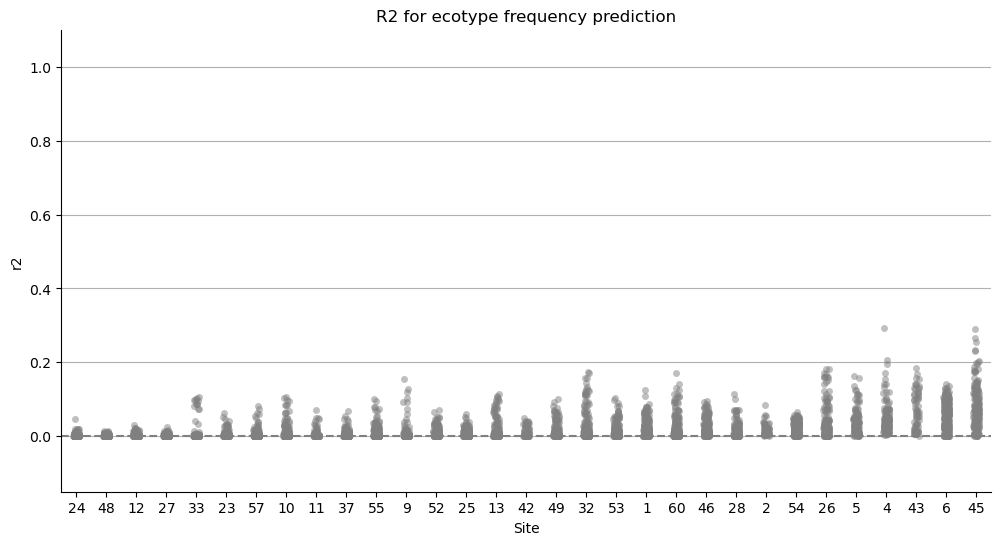

In [74]:
plt.figure(figsize=(12, 6)) 
plt.axhline(0, color='grey', linestyle='--')  # Color and style are adjustable

sns.stripplot(data=all_ef, y='r2', x='site', order=medians.index, alpha = 0.5, color='Grey')
plt.title('R2 for ecotype frequency prediction')
plt.xlabel('Site')
plt.ylabel('r2')
plt.ylim(-0.15, 1.1)
plt.grid(axis='y')
# Remove top and right spines
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(False)  # Remove the top spine
ax.spines['right'].set_visible(False)

In [75]:
all_af = pd.DataFrame()
for split_number in range(76):
    output_file_af = f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out_sv/split_number_{split_number}/r2_pred_allele_freq_wmean.csv' 
    af = pd.read_csv(output_file_af)
    af['site'] = af['sample'].str.split('_').str[0]
    all_af = pd.concat([all_af,af])

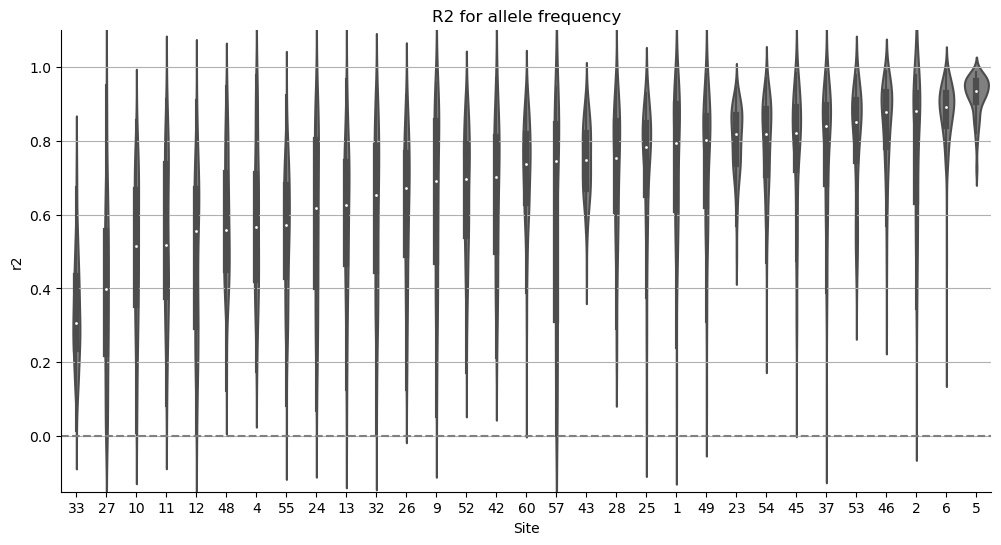

In [76]:
medians = all_af.groupby('site')['r2'].median().sort_values()

# Set the size of the plot
plt.figure(figsize=(12, 6))  # You can adjust the width and height as needed

# Create the plot, ordering by median 'r2'
# Use 'scale' to adjust the width of violins; options are 'area', 'count', or 'width'
sns.violinplot(data=all_af, y='r2', x='site', order=medians.index, color='Grey')

# Draw a horizontal line at y=0
plt.axhline(0, color='grey', linestyle='--')  # Color and style are adjustable

# Optionally, add labels or a title
plt.title('R2 for allele frequency')
plt.xlabel('Site')
plt.ylabel('r2')
plt.ylim(-0.15, 1.1)
plt.grid(axis='y')
# Remove top and right spines
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(False)  # Remove the top spine
ax.spines['right'].set_visible(False)  # Remove the right spine
# Show the plot
plt.show()

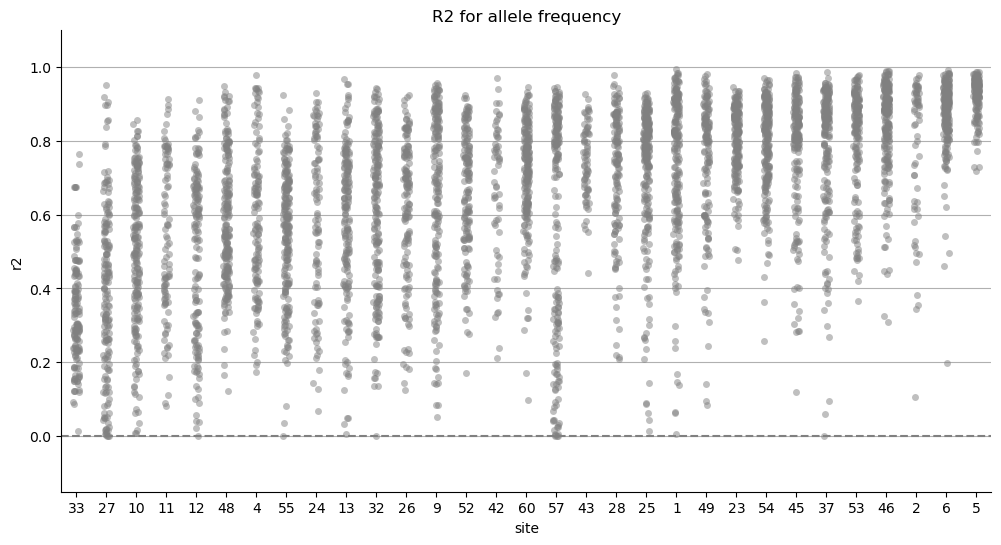

In [77]:
medians = all_af.groupby('site')['r2'].median().sort_values()
plt.figure(figsize=(12, 6)) 
plt.axhline(0, color='grey', linestyle='--')  # Color and style are adjustable

sns.stripplot(data=all_af, y='r2', x='site', order=medians.index, alpha = 0.5, color='Grey')
plt.title('R2 for allele frequency')
plt.ylim(-0.15, 1.1)
plt.grid(axis='y')
# Remove top and right spines
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(False)  # Remove the top spine
ax.spines['right'].set_visible(False)  # Remove the right spine

In [4]:
all_ef = pd.DataFrame()
for split_number in range(76):
    output_file_ef = f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out_sv/split_number_{split_number}/r2_pred_ecotype_freq_wmean_clumped.csv' 
    ef = pd.read_csv(output_file_ef)
    ef['site'] = ef['sample'].str.split('_').str[0]
    all_ef = pd.concat([all_ef,ef])

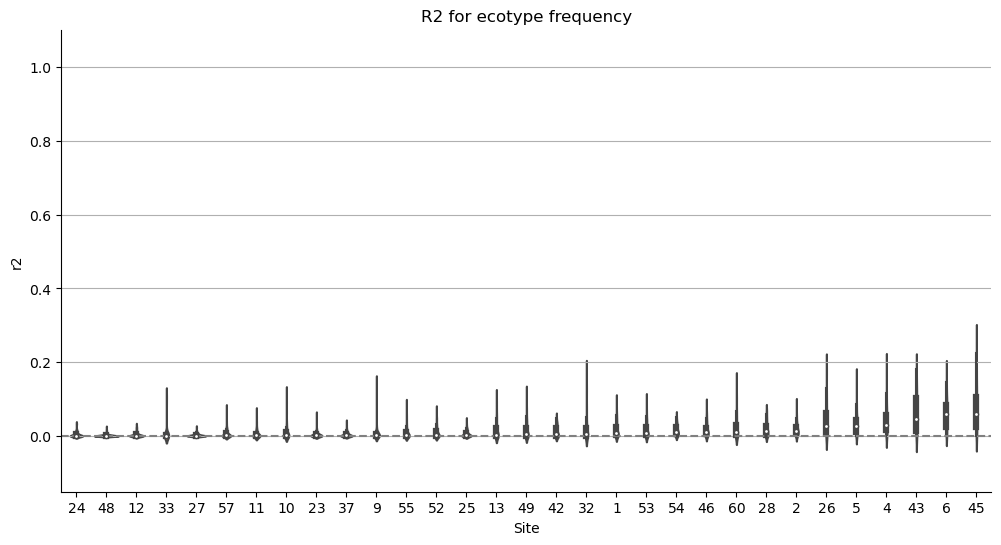

In [5]:
medians = all_ef.groupby('site')['r2'].median().sort_values()

# Set the size of the plot
plt.figure(figsize=(12, 6))  # You can adjust the width and height as needed

# Create the plot, ordering by median 'r2'
# Use 'scale' to adjust the width of violins; options are 'area', 'count', or 'width'
sns.violinplot(data=all_ef, y='r2', x='site', order=medians.index)

# Draw a horizontal line at y=0
plt.axhline(0, color='grey', linestyle='--')  # Color and style are adjustable
plt.ylim(-0.15, 1.1)
plt.grid(axis='y')
# Remove top and right spines
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(False)  # Remove the top spine
ax.spines['right'].set_visible(False)

# Optionally, add labels or a title
plt.title('R2 for ecotype frequency')
plt.xlabel('Site')
plt.ylabel('r2')

# Show the plot
plt.show()

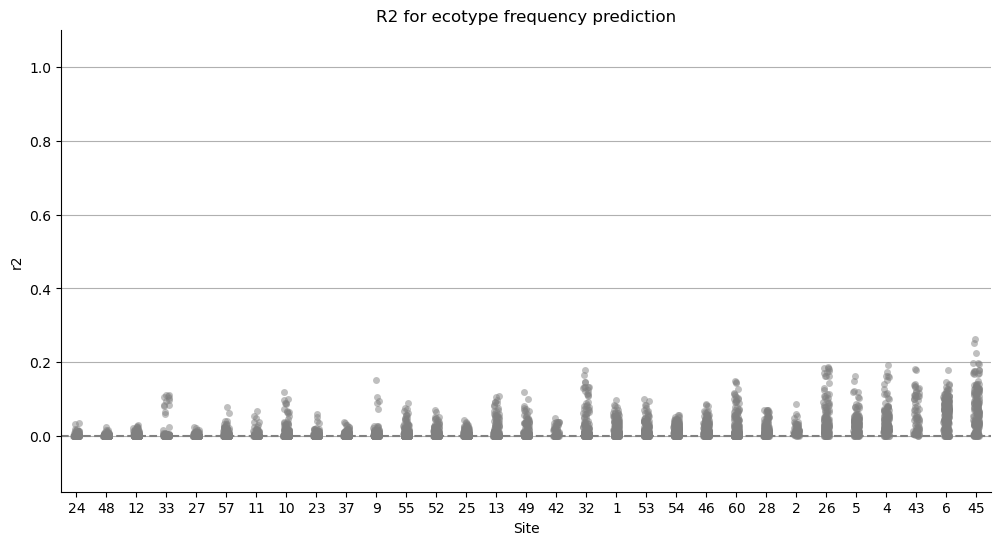

In [6]:
plt.figure(figsize=(12, 6)) 
plt.axhline(0, color='grey', linestyle='--')  # Color and style are adjustable

sns.stripplot(data=all_ef, y='r2', x='site', order=medians.index, alpha = 0.5, color='Grey')
plt.title('R2 for ecotype frequency prediction')
plt.xlabel('Site')
plt.ylabel('r2')
plt.ylim(-0.15, 1.1)
plt.grid(axis='y')
# Remove top and right spines
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(False)  # Remove the top spine
ax.spines['right'].set_visible(False)

In [7]:
all_af = pd.DataFrame()
for split_number in range(76):
    output_file_af = f'/carnegie/nobackup/scratch/tbellagio/gea_grene-net/leave_1_out_sv/split_number_{split_number}/r2_pred_allele_freq_wmean_clumped.csv' 
    af = pd.read_csv(output_file_af)
    af['site'] = af['sample'].str.split('_').str[0]
    all_af = pd.concat([all_af,af])

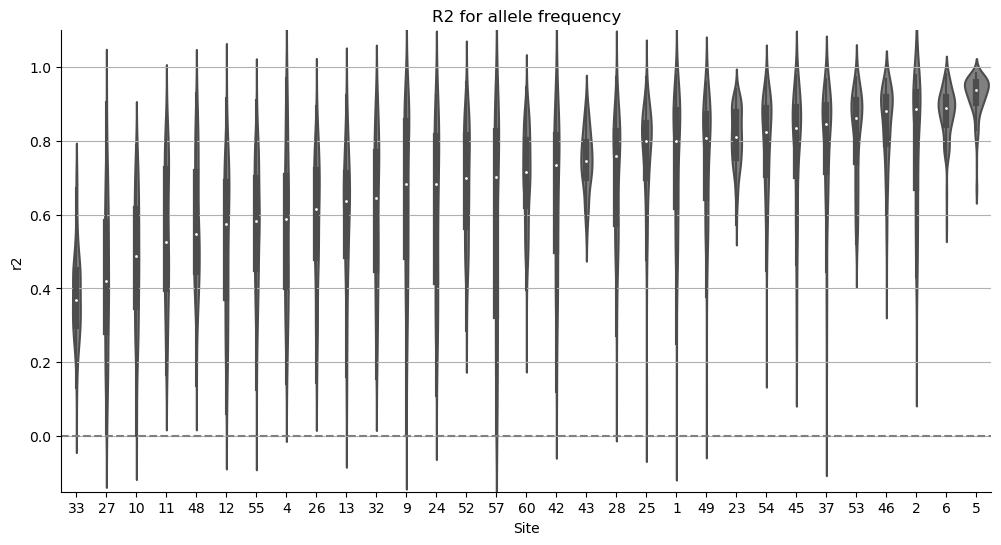

In [8]:
medians = all_af.groupby('site')['r2'].median().sort_values()

# Set the size of the plot
plt.figure(figsize=(12, 6))  # You can adjust the width and height as needed

# Create the plot, ordering by median 'r2'
# Use 'scale' to adjust the width of violins; options are 'area', 'count', or 'width'
sns.violinplot(data=all_af, y='r2', x='site', order=medians.index, color='Grey')

# Draw a horizontal line at y=0
plt.axhline(0, color='grey', linestyle='--')  # Color and style are adjustable

# Optionally, add labels or a title
plt.title('R2 for allele frequency')
plt.xlabel('Site')
plt.ylabel('r2')
plt.ylim(-0.15, 1.1)
plt.grid(axis='y')
# Remove top and right spines
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(False)  # Remove the top spine
ax.spines['right'].set_visible(False)  # Remove the right spine
# Show the plot
plt.show()

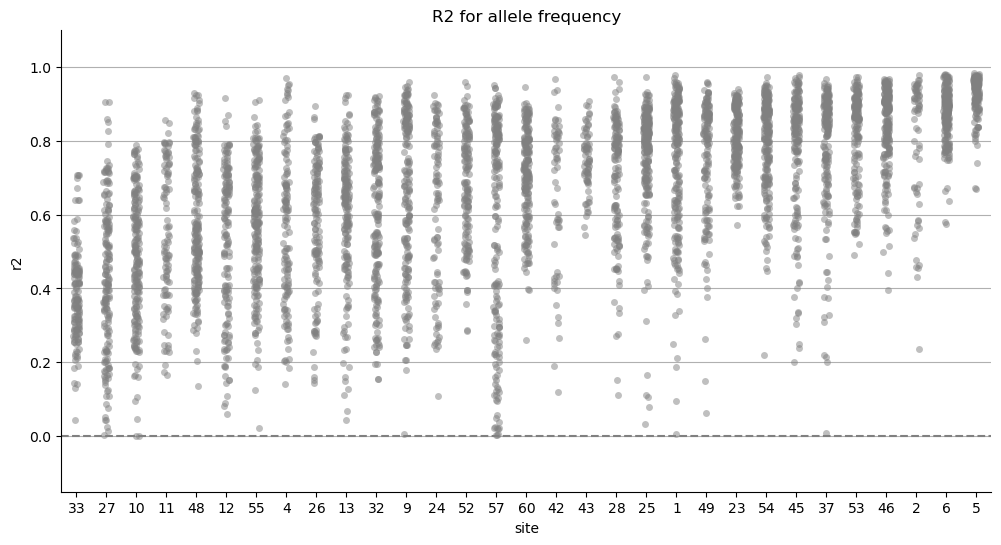

In [9]:
medians = all_af.groupby('site')['r2'].median().sort_values()
plt.figure(figsize=(12, 6)) 
plt.axhline(0, color='grey', linestyle='--')  # Color and style are adjustable

sns.stripplot(data=all_af, y='r2', x='site', order=medians.index, alpha = 0.5, color='Grey')
plt.title('R2 for allele frequency')
plt.ylim(-0.15, 1.1)
plt.grid(axis='y')
# Remove top and right spines
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(False)  # Remove the top spine
ax.spines['right'].set_visible(False)  # Remove the right spine